In [1]:
import pandas as pd        
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
file1 = pd.read_csv('numerical_df_')
file2 = pd.read_csv('categorical_df_')
file3 = pd.read_csv('Y_df_')

In [3]:
pd.set_option('display.max_columns',None)                       # concate the three files
file = pd.concat((file1, file2, file3), axis=1)
#file

# Splitting the Data

In [4]:
y = file[['TARGET_B', 'TARGET_D']]
X = file.drop(columns = ['TARGET_B', 'TARGET_D'])
#X_cat = file2

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # train test splitting the data

In [6]:
X_train_num = X_train.select_dtypes(include = np.number)     # split tthem more into numericals and categoricals
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

# Scaling the Data

In [7]:
from sklearn.preprocessing import StandardScaler    # scaling using StandardScaler:
transformer = StandardScaler().fit(X_train_num)
X_train_num_scaled = transformer.transform(X_train_num)
print(X_train_num_scaled.shape)
X_train_num_scaled= pd.DataFrame(X_train_num_scaled,columns=X_train_num.columns)
X_train_num_scaled.head()
X_train_num_scaled.describe().T

(76329, 318)


,count,mean,std,min,25%,50%,75%,max
ODATEDW,76329.0,-2.141431e-15,1.000007,-2.430027,-0.989934,0.173777,1.046560,1.628415
TCODE,76329.0,-4.142482e-18,1.000007,-0.056202,-0.056202,-0.055160,-0.054118,74.993239
DOB,76329.0,8.010350e-17,1.000007,-1.276055,-1.181812,-0.053237,0.881226,3.276694
AGE,76329.0,2.076826e-16,1.000007,-4.192874,-0.665296,-0.000476,0.718068,2.516441
INCOME,76329.0,1.653502e-16,1.000007,-1.843893,-0.667180,0.509533,0.509533,1.686246
...,...,...,...,...,...,...,...,...
CONTROLN,76329.0,-6.534882e-17,1.000007,-1.736750,-0.863586,0.000091,0.864421,1.734942
HPHONE_D,76329.0,6.916549e-17,1.000007,-1.001324,-1.001324,0.998678,0.998678,0.998678
RFA_2F,76329.0,-9.197241e-17,1.000007,-0.849602,-0.849602,0.082301,1.014205,1.946108
CLUSTER2,76329.0,1.023984e-18,1.000007,-1.630584,-0.883427,0.023835,0.931098,1.624887


In [8]:
X_test_scaled_arr = transformer.transform(X_test_num)                             # applying scaler to X_test_num
X_test_num_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_num_scaled

,ODATEDW,TCODE,DOB,AGE,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER
0,1.337488,-0.055160,1.443872,-1.495315,1.097889,0.849945,-0.207353,-0.213044,0.218508,-0.771783,-0.880272,1.840828,-0.025613,-0.352731,-0.352145,-0.364906,0.703363,-0.436673,-0.452181,0.504322,-0.343716,0.579639,-0.448168,0.063247,-0.128195,-0.252116,-0.321105,-0.176004,-0.241252,-0.242828,-0.246163,-0.197599,-0.058522,-0.278376,-0.236891,-0.101748,0.146802,0.063007,-0.110788,-0.384392,-0.264912,-0.244553,-0.422475,0.463917,-1.051031,0.728292,0.859636,-0.364334,-0.413299,1.829771,1.149424,-0.205646,-0.755853,-0.695061,-0.232047,-1.665735,0.623368,0.934899,0.132842,-0.885660,-0.858458,-0.794735,-0.752566,0.408107,0.434992,0.126454,-0.073300,-0.499978,0.455571,0.287409,-0.906571,-0.220600,0.215444,0.287943,0.759681,0.721981,-0.167643,-0.399357,-0.423744,-0.349259,-0.304920,-0.274986,-0.157105,-0.057496,-0.007543,-0.095048,0.057160,0.706035,-0.692896,0.544625,-0.620533,0.012348,0.410705,0.430556,0.447636,0.438126,0.360370,-0.353247,0.022815,0.339572,-0.054477,-0.087973,-0.741221,0.528428,0.764955,0.980768,-0.597889,-0.432995,-0.454533,-0.285702,-0.321729,-0.157625,0.434301,0.893711,0.780719,-0.355978,-0.514116,1.697775,1.971960,1.760712,0.339204,-0.333759,-0.091198,-0.487376,-0.593476,-0.663578,-0.298267,-0.283067,-0.531968,-0.158455,-0.324777,0.769350,0.719683,0.513842,0.574006,0.902888,0.874876,0.362188,-1.071132,-0.619582,0.196882,0.490105,0.833837,0.245294,1.433999,1.610971,-0.189488,-0.795797,-0.865605,-0.059838,0.516589,0.408837,0.365250,1.129875,2.122702,-0.230229,-0.848636,-0.662330,1.472978,-0.477299,0.412993,-0.357108,-0.124283,0.520161,-0.298556,-0.430700,-0.403123,-0.208072,-0.138324,-0.342811,-0.380524,0.201239,-0.361765,-0.907503,-0.662191,-1.166383,-0.994580,-0.405217,1.138111,0.762560,1.380792,1.016920,1.167667,0.787877,0.764631,0.941149,0.808853,-0.717799,0.594304,1.314526,0.179925,-0.251991,0.436545,-0.420798,-0.343213,-0.424792,-0.168085,-0.577774,-0.564418,-0.007487,-1.251650,-0.208637,0.111521,0.867372,-0.586735,-0.403610,0.980645,-0.120241,-0.961049,0.678541,0.103011,-0.090690,-0.247446,-0.679456,0.362296,0.577993,1.086325,-0.943291,1.841718,-0.043123,1.088522,-1.026829,0.660095,-0.477058,1.474373,-0.698310,-1.559576,-1.339484,1.151823,-0.161662,2.052644,0.659070,0.332473,

# Encoding the Data

In [9]:
from sklearn.preprocessing import OneHotEncoder                              # encoding categorical data
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
X_train_encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_onehot_encoded_cat = pd.DataFrame(X_train_encoded_cat, columns=cols)
X_train_onehot_encoded_cat.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,MAILCODE_B,HOMEOWNR_U,GENDER_M,GENDER_Others,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [10]:
# applying encoder to X_test_cat
X_test_encoded_cat = encoder.transform(X_test_cat).toarray()
X_test_onehot_encoded_cat = pd.DataFrame(X_test_encoded_cat, columns=cols)
X_test_onehot_encoded_cat.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,MAILCODE_B,HOMEOWNR_U,GENDER_M,GENDER_Others,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Concatenating Scaled and Encoded Data

In [11]:
X_train_treated = pd.concat([X_train_num_scaled, X_train_onehot_encoded_cat], axis=1) # joining transformed and encoded trained data 
X_train_treated

,ODATEDW,TCODE,DOB,AGE,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,MAILCODE_B,HOMEOWNR_U,GENDER_M,GENDER_Others,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,1.337488,-0.027017,-1.276055,-0.000476,0.509533,-0.361560,-0.207353,-0.125646,0.417324,-0.658816,0.034684,-0.696876,-0.267926,-0.439826,-0.453573,-0.429354,0.851009,-0.436673,-0.652222,-0.402222,0.531068,0.149955,-0.328057,0.063247,0.436059,0.038253,-0.321105,0.708816,-0.241252,0.620965,1.703345,-0.197599,-0.058522,-0.278376,0.548961,0.539062,0.447445,0.423010,0.374630,0.356929,0.701340,0.620743,0.453214,-0.735673,1.511966,-0.217177,-1.722154,-1.024408,-0.156205,0.056674,-0.708460,1.245811,0.075054,0.793841,0.748268,1.317087,0.809769,-1.047767,-1.287337,0.641349,0.624520,0.670026,0.610448,0.042971,-0.391870,-0.507467,-0.700625,-0.236124,-0.240400,-0.375827,0.529244,0.342862,-0.505845,-0.476274,-1.562609,-1.480293,3.736528,2.027720,1.250671,0.869844,-0.304920,-0.274986,-0.157105,0.247630,0.236664,0.339455,0.503908,-0.769048,0.838546,0.389727,-0.420180,-0.655027,-0.895873,-0.364926,-0.354926,-0.568660,0.075502,-0.020161,-0.924439,-0.559339,-0.696965,0.053227,1.187960,0.041574,-0.256316,-0.192539,0.621319,-0.432995,-0.255662,-0.285702,-0.208923,0.469978,1.089500,1.084261,0.848329,-0.245079,-0.113062,0.014098,0.006740,0.023137,-0.445506,-0.333759,2.884930,0.677756,-0.593476,-1.307998,2.389700,0.725605,-0.531968,0.930223,1.164569,1.103678,0.925726,-0.114991,0.077034,-0.217962,0.038644,-0.010842,0.585086,-0.871100,-0.601392,-0.182246,0.523477,0.245294,0.237889,-0.488642,-0.406977,0.177280,-0.974483,-0.716185,0.280029,0.879572,0.515494,0.360618,-0.485963,-0.412145,0.015920,-0.016367,0.121133,0.929205,-0.150548,0.204148,-1.004939,-0.236863,-1.193909,2.275798,0.701588,4.399649,-0.138324,-0.342811,-0.380524,0.471439,-0.043210,-0.907503,1.260300,1.701737,1.439053,1.032226,0.107495,0.010196,0.215873,-1.056679,0.293838,1.521624,2.039211,0.941149,-1.408250,-0.070375,-0.135525,0.754959,-0.211087,1.191952,1.486656,-0.420798,0.188298,0.073379,-0.559766,-0.918973,-0.564418,-1

In [12]:
X_test_treated = pd.concat([X_test_num_scaled, X_test_onehot_encoded_cat], axis=1) # joining transformed and encoded test data 

# Running the Regressor

In [13]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=0, solver='lbfgs')
LogReg .fit(X_train_treated, y_train['TARGET_B'])
LogReg .score(X_test_treated, y_test['TARGET_B'])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9486977938479275

In [14]:
from sklearn.metrics import accuracy_score   # checking the model prediction and accuracy
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LogReg.predict(X_test_treated)

print("accuracy:"   ,accuracy_score(y_test['TARGET_B'], pred))
print("precision: ",precision_score(y_test['TARGET_B'],pred, pos_label= 0))
print("recall: ",recall_score(y_test['TARGET_B'],pred, pos_label= 0))
print("f1: ",f1_score(y_test['TARGET_B'],pred, pos_label= 0))


accuracy: 0.9486977938479275
precision:  0.9487475107431087
recall:  0.99994476663905
f1:  0.9736735956113696


In [15]:
from sklearn.metrics import confusion_matrix    # confusion matrix for better reading of the prediction
confusion_matrix(y_test['TARGET_B'],pred)

array([[18104,     1],
       [  978,     0]], dtype=int64)

# Handling Imbalance in the Data

<Axes: xlabel='TARGET_B'>

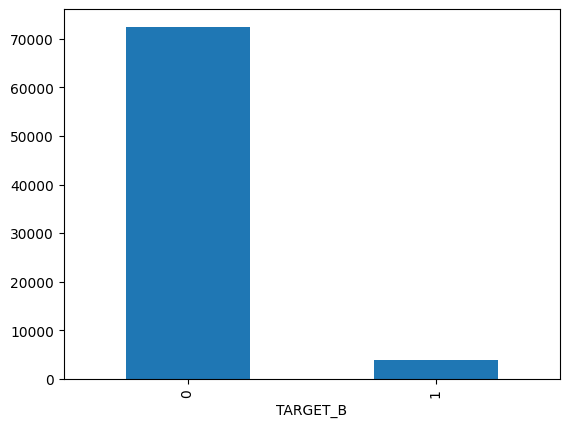

In [16]:
count_classes = y_train['TARGET_B'].value_counts()  # barchart to show imbalance in the target data
count_classes
count_classes.plot(kind = 'bar')

In [17]:
pd.set_option('display.max_columns',None)                 # treated feature data is concate with the target in order to ensure index harmony before upsampling
y_train.reset_index(drop=True, inplace = True)
trainset = pd.concat((X_train_treated, y_train),axis=1)
trainset 

,ODATEDW,TCODE,DOB,AGE,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,MAILCODE_B,HOMEOWNR_U,GENDER_M,GENDER_Others,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B,TARGET_D
0,1.337488,-0.027017,-1.276055,-0.000476,0.509533,-0.361560,-0.207353,-0.125646,0.417324,-0.658816,0.034684,-0.696876,-0.267926,-0.439826,-0.453573,-0.429354,0.851009,-0.436673,-0.652222,-0.402222,0.531068,0.149955,-0.328057,0.063247,0.436059,0.038253,-0.321105,0.708816,-0.241252,0.620965,1.703345,-0.197599,-0.058522,-0.278376,0.548961,0.539062,0.447445,0.423010,0.374630,0.356929,0.701340,0.620743,0.453214,-0.735673,1.511966,-0.217177,-1.722154,-1.024408,-0.156205,0.056674,-0.708460,1.245811,0.075054,0.793841,0.748268,1.317087,0.809769,-1.047767,-1.287337,0.641349,0.624520,0.670026,0.610448,0.042971,-0.391870,-0.507467,-0.700625,-0.236124,-0.240400,-0.375827,0.529244,0.342862,-0.505845,-0.476274,-1.562609,-1.480293,3.736528,2.027720,1.250671,0.869844,-0.304920,-0.274986,-0.157105,0.247630,0.236664,0.339455,0.503908,-0.769048,0.838546,0.389727,-0.420180,-0.655027,-0.895873,-0.364926,-0.354926,-0.568660,0.075502,-0.020161,-0.924439,-0.559339,-0.696965,0.053227,1.187960,0.041574,-0.256316,-0.192539,0.621319,-0.432995,-0.255662,-0.285702,-0.208923,0.469978,1.089500,1.084261,0.848329,-0.245079,-0.113062,0.014098,0.006740,0.023137,-0.445506,-0.333759,2.884930,0.677756,-0.593476,-1.307998,2.389700,0.725605,-0.531968,0.930223,1.164569,1.103678,0.925726,-0.114991,0.077034,-0.217962,0.038644,-0.010842,0.585086,-0.871100,-0.601392,-0.182246,0.523477,0.245294,0.237889,-0.488642,-0.406977,0.177280,-0.974483,-0.716185,0.280029,0.879572,0.515494,0.360618,-0.485963,-0.412145,0.015920,-0.016367,0.121133,0.929205,-0.150548,0.204148,-1.004939,-0.236863,-1.193909,2.275798,0.701588,4.399649,-0.138324,-0.342811,-0.380524,0.471439,-0.043210,-0.907503,1.260300,1.701737,1.439053,1.032226,0.107495,0.010196,0.215873,-1.056679,0.293838,1.521624,2.039211,0.941149,-1.408250,-0.070375,-0.135525,0.754959,-0.211087,1.191952,1.486656,-0.420798,0.188298,0.073379,-0.559766,-0.9

# Upsampling the Data to Fix Imbalance

In [18]:
from sklearn.utils import resample

category_0 = trainset[ trainset['TARGET_B'] == 0]       # categorizing the data into donate and not to donate
category_1 =  trainset[ trainset['TARGET_B'] == 1]

In [19]:
category_1_oversampled = resample(category_1,                      # resampling proper
                                  replace=True,
                                  n_samples = len(category_0))

In [20]:
print(category_0.shape)
print(category_1_oversampled.shape)

(72464, 353)
(72464, 353)


In [21]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0) # concate after resampling
data_upsampled

,ODATEDW,TCODE,DOB,AGE,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,MAILCODE_B,HOMEOWNR_U,GENDER_M,GENDER_Others,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B,TARGET_D
0,1.337488,-0.027017,-1.276055,-0.000476,0.509533,-0.361560,-0.207353,-0.125646,0.417324,-0.658816,0.034684,-0.696876,-0.267926,-0.439826,-0.453573,-0.429354,0.851009,-0.436673,-0.652222,-0.402222,0.531068,0.149955,-0.328057,0.063247,0.436059,0.038253,-0.321105,0.708816,-0.241252,0.620965,1.703345,-0.197599,-0.058522,-0.278376,0.548961,0.539062,0.447445,0.423010,0.374630,0.356929,0.701340,0.620743,0.453214,-0.735673,1.511966,-0.217177,-1.722154,-1.024408,-0.156205,0.056674,-0.708460,1.245811,0.075054,0.793841,0.748268,1.317087,0.809769,-1.047767,-1.287337,0.641349,0.624520,0.670026,0.610448,0.042971,-0.391870,-0.507467,-0.700625,-0.236124,-0.240400,-0.375827,0.529244,0.342862,-0.505845,-0.476274,-1.562609,-1.480293,3.736528,2.027720,1.250671,0.869844,-0.304920,-0.274986,-0.157105,0.247630,0.236664,0.339455,0.503908,-0.769048,0.838546,0.389727,-0.420180,-0.655027,-0.895873,-0.364926,-0.354926,-0.568660,0.075502,-0.020161,-0.924439,-0.559339,-0.696965,0.053227,1.187960,0.041574,-0.256316,-0.192539,0.621319,-0.432995,-0.255662,-0.285702,-0.208923,0.469978,1.089500,1.084261,0.848329,-0.245079,-0.113062,0.014098,0.006740,0.023137,-0.445506,-0.333759,2.884930,0.677756,-0.593476,-1.307998,2.389700,0.725605,-0.531968,0.930223,1.164569,1.103678,0.925726,-0.114991,0.077034,-0.217962,0.038644,-0.010842,0.585086,-0.871100,-0.601392,-0.182246,0.523477,0.245294,0.237889,-0.488642,-0.406977,0.177280,-0.974483,-0.716185,0.280029,0.879572,0.515494,0.360618,-0.485963,-0.412145,0.015920,-0.016367,0.121133,0.929205,-0.150548,0.204148,-1.004939,-0.236863,-1.193909,2.275798,0.701588,4.399649,-0.138324,-0.342811,-0.380524,0.471439,-0.043210,-0.907503,1.260300,1.701737,1.439053,1.032226,0.107495,0.010196,0.215873,-1.056679,0.293838,1.521624,2.039211,0.941149,-1.408250,-0.070375,-0.135525,0.754959,-0.211087,1.191952,1.486656,-0.420798,0.188298,0.073379,-0.559766,-0.9

In [22]:
X_train_1 = data_upsampled.drop(['TARGET_B', 'TARGET_D'], axis = 1)   # separating the data into features and target

y_train_1 = data_upsampled['TARGET_B'] 

# Run the Regressor Again for UpSampling

In [25]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.linear_model import LogisticRegression

# LogReg = LogisticRegression(random_state=0, solver='lbfgs')
# LogReg .fit(X_train_1, y_train_1)
# LogReg .score(X_test_treated, y_test['TARGET_B'])
# pred = LogReg.predict(X_test_treated)

# print("accuracy:"   ,accuracy_score(y_test['TARGET_B'], pred))
# print("precision: ",precision_score(y_test['TARGET_B'],pred, pos_label= 0))
# print("recall: ",recall_score(y_test['TARGET_B'],pred, pos_label= 0))
# print("f1: ",f1_score(y_test['TARGET_B'],pred, pos_label= 0))

In [26]:
from sklearn.metrics import confusion_matrix    # confusion matrix for better reading of the prediction
confusion_matrix(y_test['TARGET_B'],pred)

array([[18104,     1],
       [  978,     0]], dtype=int64)

# DownSampling the Data 

In [27]:
category_0_oversampled = resample(category_0,                     # downsampling the target
                                  replace=True,
                                  n_samples = len(category_1))

In [28]:
print(category_1.shape)
print(category_0_oversampled.shape)

(3865, 353)
(3865, 353)


In [29]:
data_upsampled_1 = pd.concat([category_1, category_0_oversampled], axis=0) # concate data after downsampling
data_upsampled_1

,ODATEDW,TCODE,DOB,AGE,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,MAILCODE_B,HOMEOWNR_U,GENDER_M,GENDER_Others,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B,TARGET_D
30,0.755632,-0.056202,-0.150293,0.856404,0.509533,-0.361560,-0.007327,2.146696,-0.377941,0.583823,0.492163,-0.696876,-0.510240,-0.362740,-0.345935,-0.372962,0.851009,-0.436673,-0.652222,-0.402222,0.531068,0.579639,-0.388113,0.063247,-0.269259,-0.542485,-0.321105,-0.176004,-0.241252,-0.242828,-0.246163,0.746417,-0.058522,-0.454256,-0.236891,-0.101748,-0.454483,0.543011,0.617339,0.604036,0.425268,0.476527,0.599163,-0.069234,-1.051031,0.570714,1.031756,-0.199315,-1.313126,-0.104517,1.381660,1.003901,0.739779,-0.248390,-0.232047,-1.936900,0.436967,0.934899,0.487887,0.259597,-0.184377,0.361656,-0.582189,0.529820,0.297182,0.126454,0.083531,-0.236124,0.919552,-0.817985,-0.496338,-0.558677,0.115265,0.267832,1.160076,1.253564,-0.539469,-0.817819,-0.732189,-0.641843,-0.304920,-0.274986,-0.157105,-0.306275,-0.350067,-0.529551,-0.389589,1.120902,-1.123614,0.544625,-0.620533,-0.035322,-0.050440,0.762007,1.064991,0.270329,0.787671,-0.852875,-0.734988,-1.458251,-0.696965,-1.076375,-0.526868,-0.932133,0.327267,0.428624,0.296197,-0.212113,-0.355097,-0.285702,-0.509738,-0.565567,-0.521199,0.049846,0.611695,-0.355978,-0.647801,1.697775,0.942559,1.181521,0.339204,-0.333759,-0.796071,-0.545633,-0.593476,-0.663578,-0.701462,-0.619291,-0.531968,0.090386,-0.181571,0.009515,-0.022069,1.118015,0.914952,0.890434,0.793007,0.281832,-0.795095,-0.871100,-0.601392,-0.720128,2.075278,1.104733,0.237889,0.561165,0.028001,-0.633617,-0.647850,-0.716185,-0.902774,1.915190,1.116468,0.104198,0.383592,-0.048312,-0.416358,-0.662330,1.472978,-0.879157,-1.027168,1.077212,-0.417835,1.352887,-1.044683,-0.430700,-0.403123,-0.208072,-0.138324,-0.342811,-0.748812,-0.879562,-0.043210,-0.802613,-1.253726,-1.619244,-0.807378,-2.130148,0.107495,0.625766,-0.148165,0.682469,-0.143077,-0.007015,0.706696,0.160846,-1.408250,-0.501991,1.202494,0.335283,0.961948,1.372445,-0.613565,-0.420798,-0.874724,

In [30]:
X_train_2 = data_upsampled_1.drop(['TARGET_B', 'TARGET_D'], axis = 1)   # separating the data into features and target

y_train_2 = data_upsampled_1['TARGET_B'] 

# Run Regressor again for Downsampling

In [31]:
from sklearn.linear_model import LogisticRegression                # run model again to check if differences exist between downsampling and upsampling results

LogReg = LogisticRegression(random_state=0, solver='lbfgs')
LogReg .fit(X_train_2, y_train_2)
LogReg .score(X_test_treated, y_test['TARGET_B'])

LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_2, y_train_2)
pred = LR_over.predict(X_test_treated)

pred = LogReg.predict(X_test_treated)

print("accuracy:"   ,accuracy_score(y_test['TARGET_B'], pred))
print("precision: ",precision_score(y_test['TARGET_B'],pred, pos_label= 0))
print("recall: ",recall_score(y_test['TARGET_B'],pred, pos_label= 0))
print("f1: ",f1_score(y_test['TARGET_B'],pred, pos_label= 0))

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.5757480480008385
precision:  0.960183908045977
recall:  0.5767467550400441
f1:  0.7206349206349205


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import confusion_matrix    # confusion matrix for better reading of the prediction
confusion_matrix(y_test['TARGET_B'],pred)

array([[10442,  7663],
       [  433,   545]], dtype=int64)